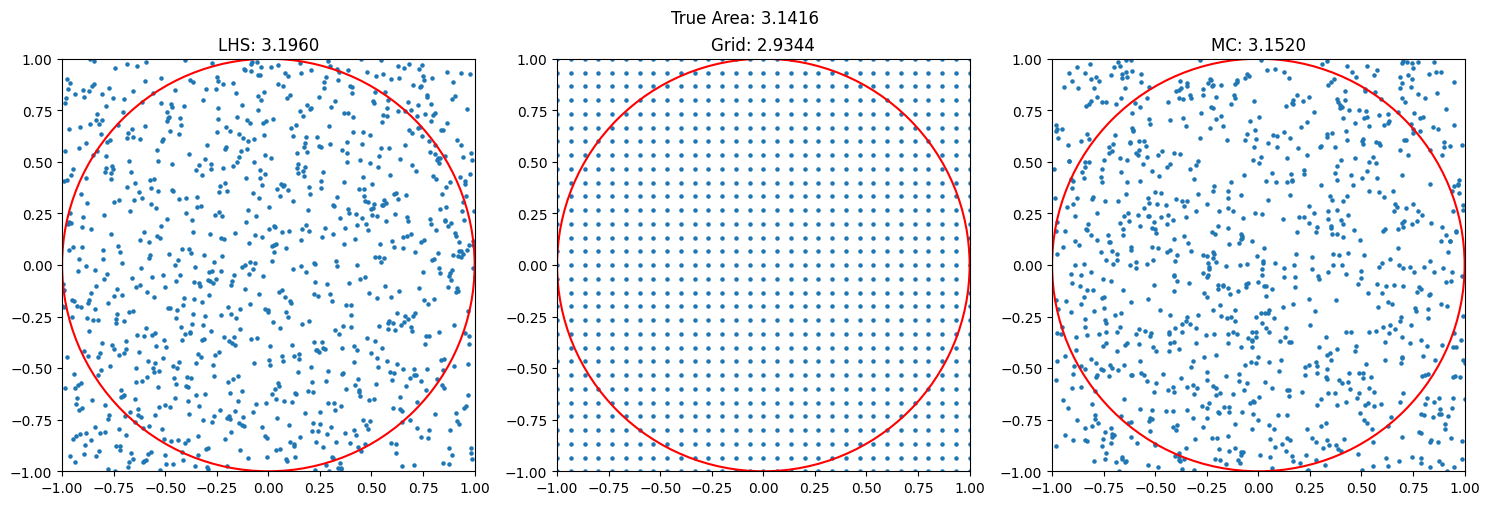

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
import matplotlib.patches as patches

# Circle parameters
radius = 1.0
area_true = np.pi * radius**2
n_samples = 1000

# --- Latin Hypercube Sampling ---
lhs_sampler = qmc.LatinHypercube(d=2)
lhs_samples = lhs_sampler.random(n=n_samples)
lhs_samples = 2 * lhs_samples - 1  # map from [0,1] to [-1,1]

# --- Grid Sampling ---
grid_side = int(np.sqrt(n_samples))
x = np.linspace(-1, 1, grid_side)
y = np.linspace(-1, 1, grid_side)
xx, yy = np.meshgrid(x, y)
grid_points = np.vstack([xx.ravel(), yy.ravel()]).T

# --- Monte Carlo Sampling ---
mc_samples = 2 * np.random.rand(n_samples, 2) - 1  # uniform in [-1, 1]^2

# --- Function to estimate area ---
def estimate_area(points):
    inside = np.sum(points[:, 0]**2 + points[:, 1]**2 <= radius**2)
    return (4 * inside) / len(points)  # square area = 4

# --- Estimate areas ---
lhs_area = estimate_area(lhs_samples)
grid_area = estimate_area(grid_points)
mc_area = estimate_area(mc_samples)

# --- Plotting ---
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot settings
def plot_samples(ax, samples, title):
    ax.scatter(samples[:, 0], samples[:, 1], s=5)
    circle = patches.Circle((0, 0), radius, fill=False, edgecolor='red', linewidth=1.5)
    ax.add_patch(circle)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_title(title)

plot_samples(axs[0], lhs_samples, f'LHS: {lhs_area:.4f}')
plot_samples(axs[1], grid_points, f'Grid: {grid_area:.4f}')
plot_samples(axs[2], mc_samples, f'MC: {mc_area:.4f}')

plt.suptitle(f'True Area: {area_true:.4f}')
plt.tight_layout()
plt.show()


(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)


/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_1422/3744133428.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([errors_lhs, errors_grid, errors_mc], labels=['LHS', 'Grid', 'MC'])


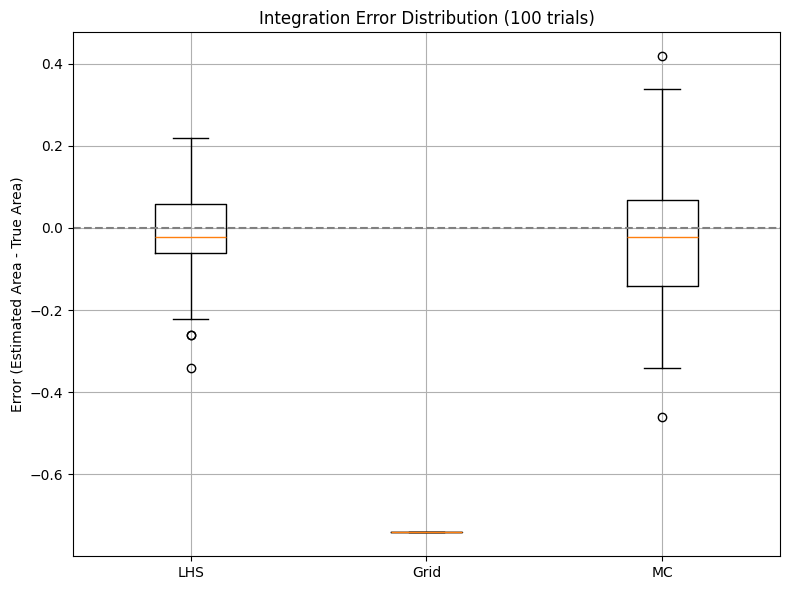

{'Variance_LHS': np.float64(0.011920640000000003),
 'Variance_Grid': np.float64(4.930380657631324e-32),
 'Variance_MC': np.float64(0.02780736)}

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
import matplotlib.patches as patches

# Parameters
radius = 1.0
area_true = np.pi * radius**2
n_samples = 100
n_trials = 100

# Storage for errors
errors_lhs = []
errors_grid = []
errors_mc = []

# Function to estimate area
def estimate_area(points):
    inside = np.sum(points[:, 0]**2 + points[:, 1]**2 <= radius**2)
    return (4 * inside) / len(points)

# Repeat sampling and estimation
for _ in range(n_trials):
    # LHS
    lhs_sampler = qmc.LatinHypercube(d=2)
    lhs_samples = lhs_sampler.random(n=n_samples)
    lhs_samples = 2 * lhs_samples - 1
    print(lhs_samples.shape)

    lhs_area = estimate_area(lhs_samples)
    errors_lhs.append(lhs_area - area_true)

    # Grid
    grid_side = int(np.sqrt(n_samples))
    x = np.linspace(-1, 1, grid_side)
    y = np.linspace(-1, 1, grid_side)
    xx, yy = np.meshgrid(x, y)
    grid_points = np.vstack([xx.ravel(), yy.ravel()]).T
    grid_area = estimate_area(grid_points)
    errors_grid.append(grid_area - area_true)

    # Monte Carlo
    mc_samples = 2 * np.random.rand(n_samples, 2) - 1
    mc_area = estimate_area(mc_samples)
    errors_mc.append(mc_area - area_true)

# Compute variances
var_lhs = np.var(errors_lhs)
var_grid = np.var(errors_grid)
var_mc = np.var(errors_mc)

# Boxplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([errors_lhs, errors_grid, errors_mc], labels=['LHS', 'Grid', 'MC'])
ax.axhline(0, color='gray', linestyle='--')
ax.set_title('Integration Error Distribution (100 trials)')
ax.set_ylabel('Error (Estimated Area - True Area)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display variances
{
    "Variance_LHS": var_lhs,
    "Variance_Grid": var_grid,
    "Variance_MC": var_mc
}


In [11]:
type([]) == list

True

In [14]:
lhs_sampler

In [19]:
type(lhs_samples) == np.ndarray

True

In [21]:
# Generic imports
#%%
import os
import random
import shutil
import progress.bar
from   datetime import datetime
from scipy.stats import qmc


# Custom imports
from shapes import *
from meshes import *

n_sampling_pts = 50
mesh_domain    = False
plot_pts       = True
show_quadrants = True
n_shapes       = 10
time           = datetime.now().strftime('%Y-%m-%d_%H_%M_%S')
dataset_dir    = 'dataset_'+time+'/'
mesh_dir       = dataset_dir+'meshes/'
img_dir        = dataset_dir+'images/'
det_img_dir    = dataset_dir+'det_images/'

filename       = 'shape'
magnify        = 1.0
max_radius = (2)**0.5
xmin           =-2.0
xmax           = 2.0
ymin           =-2.0
ymax           = 2.0
n_tri_max      = 5000
n_pts = 4

### generate latin hypercube points in the defined space
equ_dim_lim = 2
latin_gen = False
latin_gen = qmc.LatinHypercube(d=n_pts*2)
latin_gen = latin_gen.random(n=n_shapes)
latin_gen = equ_dim_lim * latin_gen

In [25]:
latin_gen[0,:].reshape(-1,2)

array([[0.63779148, 1.33718214],
       [1.44815483, 0.22925257],
       [1.29895158, 1.99515605],
       [0.82047098, 1.75375766]])

100: [300]
101: [299, 301]
102: [299, 302]
103: [298, 303]
104: [298, 304]
105: [298, 305]
106: [297, 306]
107: [297, 307]
108: [296, 308]
109: [296, 309]
110: [296, 310]
111: [295, 311]
112: [295, 312]
113: [294, 313]
114: [294, 314]
115: [294, 315]
116: [293, 316]
117: [293, 317]
118: [292, 318]
119: [292, 319]
120: [292, 320]
121: [291, 321]
122: [291, 322]
123: [290, 323]
124: [290, 324]
125: [290, 325]
126: [289, 326]
127: [289, 327]
128: [288, 328]
129: [288, 329]
130: [288, 330]
131: [287, 331]
132: [287, 332]
133: [286, 333]
134: [286, 334]
135: [286, 335]
136: [285, 336]
137: [285, 337]
138: [284, 338]
139: [284, 339]
140: [284, 340]
141: [283, 341]
142: [283, 342]
143: [282, 343]
144: [282, 344]
145: [282, 345]
146: [281, 346]
147: [281, 347]
148: [280, 348]
149: [280, 349]
150: [280, 350]
151: [279, 351]
152: [279, 352]
153: [278, 353]
154: [278, 354]
155: [278, 355]
156: [277, 356]
157: [277, 357]
158: [276, 358]
159: [276, 359]
160: [276, 360]
161: [275, 361]
162: [275, 36

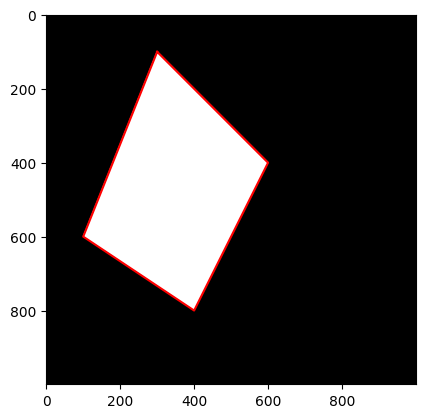

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def scanline_fill(polygon, width, height):
    # Convert to integer pixel coordinates
    polygon = np.array(polygon, dtype=int)
    filled = np.zeros((height, width), dtype=np.uint8)

    ymin = np.min(polygon[:,1])
    ymax = np.max(polygon[:,1])

    for y in range(ymin, ymax + 1):
        intersections = []
        for i in range(len(polygon)):
            p1 = polygon[i]
            p2 = polygon[(i + 1) % len(polygon)]
            if p1[1] == p2[1]: continue  # skip horizontal edges
            if (y < min(p1[1], p2[1])) or (y > max(p1[1], p2[1])): continue
            # Compute intersection x
            x = int(p1[0] + (y - p1[1]) * (p2[0] - p1[0]) / (p2[1] - p1[1]))
            intersections.append(x)
        intersections.sort()
        unique_list = []
        seen = set()
        for item in intersections:
            if item not in seen:
                seen.add(item)
                unique_list.append(item)
        intersections = unique_list
        print(f"{y}: {intersections}")
        for i in range(0, len(intersections), 2):
            if i + 1 < len(intersections):
                x_start = intersections[i]
                x_end = intersections[i + 1]
                filled[y, x_start:x_end+1] = 1
    return filled

# Example polygon
polygon = [(300, 100), (600, 400), (400, 800), (100, 600)]
img = scanline_fill(polygon, width=1000, height=1000)

plt.imshow(img, cmap='gray')
plt.plot(*zip(*polygon + [polygon[0]]), color='red')  # polygon outline
plt.show()


In [126]:
# Generic imports
#%%
import os
import random
import shutil
import progress.bar
from   datetime import datetime
from scipy.stats import qmc
import pandas as pd


import shapes
import meshes
import importlib

importlib.reload(shapes)
importlib.reload(meshes)

from shapes import *
from meshes import *

### ************************************************
### Generate full dataset
# Parameters

n_sampling_pts = 20
mesh_domain    = False
plot_pts       = True
show_quadrants = True
n_shapes       = 200
time           = datetime.now().strftime('%Y-%m-%d_%H_%M_%S')
dataset_dir    = 'dataset_'+time+'/'
mesh_dir       = dataset_dir+'meshes/'
img_dir        = dataset_dir+'images/'
det_img_dir    = dataset_dir+'det_images/'
bit_img_dir    = dataset_dir+'bit_images/'
save_det_plot = False

filename       = 'shape'
magnify        = 1.0
max_radius = (2)**0.5
xmin           =-2.0
xmax           = 2.0
ymin           =-2.0
ymax           = 2.0
n_tri_max      = 5000
n_pts = 4

### generate latin hypercube points in the defined space
equ_dim_lim = 1.5
latin_gen = qmc.LatinHypercube(d=n_pts*2)
latin_gen = latin_gen.random(n=n_shapes)
latin_gen = equ_dim_lim * latin_gen
latin_gen = False


# Create directories if necessary
if not os.path.exists(mesh_dir):
    os.makedirs(mesh_dir)
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
if not os.path.exists(det_img_dir):
    os.makedirs(det_img_dir)
if not os.path.exists(bit_img_dir):
    os.makedirs(bit_img_dir)

# Generate dataset
bar = progress.bar.Bar('Generating shapes', max=n_shapes)
df = pd.DataFrame(columns=['curve_points', 'area', 'perimeter','bitmap'])

for i in range(0,n_shapes):
    generated = False
    while (not generated):

        #n_pts  = random.randint(3, 7)
        radius = np.random.uniform(0.0, 1.0, size=n_pts)
        edgy   = np.random.uniform(0.0, .5, size=n_pts)
        shape  = Shape(filename+'_'+str(i),
                       None,
                       n_pts,
                       n_sampling_pts,
                       radius,
                       edgy,
                       save_det_plot = save_det_plot)
        
        shape.generate(magnify=1.0,
                       xmin=xmin,
                       xmax=xmax,
                       ymin=ymin,
                       ymax=ymax,
                       latin_gen = latin_gen)
        
        if save_det_plot:
            img  = filename+'_'+str(i)+"det_plot"+'.png'
            shutil.move(img,  det_img_dir)

        shape.generate_bitmap()
        img  = filename+'_'+str(i)+"bit"+'.png'
        shutil.move(img,  bit_img_dir)

        new_rows = [{'curve_points': shape.curve_pts, 'area': shape.area, 'perimeter': shape.curve_length, "bitmap": shape.bitmap}]
        df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
        generated = True
        #meshed, n_tri = shape.mesh()
        """
        if (True):
            shape.generate_image(plot_pts=plot_pts,
                                 max_radius = max_radius,
                                 xmin=xmin,
                                 xmax=xmax,
                                 ymin=ymin,
                                 ymax=ymax,
                                 show_quadrants=True)
            img  = filename+'_'+str(i)+'.png'
            mesh = filename+'_'+str(i)+'.mesh'
            shutil.move(img,  img_dir)
            #shutil.move(mesh, mesh_dir)
            generated = True
        """
    bar.next()
bit = df["bitmap"]
curve = df["area"]
# End bar
bar.finish()

# %%


/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/1870429044.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


<Figure size 640x480 with 0 Axes>

In [83]:
shape.control_pts

array([[ 1., -1.],
       [ 1.,  1.],
       [-1.,  1.],
       [-1., -1.]])

In [118]:
# Generic imports
#%%
import os
import random
import shutil
import progress.bar
from   datetime import datetime
from scipy.stats import qmc
import pandas as pd


# Custom imports
from shapes import *
from meshes import *

### ************************************************
### Generate full dataset
# Parameters
n_sampling_pts = 20
mesh_domain    = False
plot_pts       = True
show_quadrants = True
n_shapes       = 200
time           = datetime.now().strftime('%Y-%m-%d_%H_%M_%S')
dataset_dir    = 'dataset_'+time+'/'
mesh_dir       = dataset_dir+'meshes/'
img_dir        = dataset_dir+'images/'
det_img_dir    = dataset_dir+'det_images/'
bit_img_dir    = dataset_dir+'bit_images/'
save_det_plot = False

filename       = 'shape'
magnify        = 1.0
max_radius = (2)**0.5
xmin           =-2.0
xmax           = 2.0
ymin           =-2.0
ymax           = 2.0
n_tri_max      = 5000
n_pts = 4

### generate latin hypercube points in the defined space
equ_dim_lim = 1.5
latin_gen = True
latin_gen = qmc.LatinHypercube(d=n_pts*2)
latin_gen = latin_gen.random(n=n_shapes)
latin_gen = equ_dim_lim * latin_gen


# Create directories if necessary
if not os.path.exists(mesh_dir):
    os.makedirs(mesh_dir)
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
if not os.path.exists(det_img_dir):
    os.makedirs(det_img_dir)
if not os.path.exists(bit_img_dir):
    os.makedirs(bit_img_dir)

# Generate dataset
bar = progress.bar.Bar('Generating shapes', max=n_shapes)
df2 = pd.DataFrame(columns=['curve_points', 'area', 'perimeter','bitmap'])

for i in range(0,n_shapes):
    generated = False
    while (not generated):

        #n_pts  = random.randint(3, 7)
        radius = np.random.uniform(0.0, 1.0, size=n_pts)
        edgy   = np.random.uniform(0.0, .5, size=n_pts)
        shape  = Shape(filename+'_'+str(i),
                       None,
                       n_pts,
                       n_sampling_pts,
                       radius,
                       edgy,
                       save_det_plot = save_det_plot)
        
        shape.generate(magnify=1.0,
                       xmin=xmin,
                       xmax=xmax,
                       ymin=ymin,
                       ymax=ymax,
                       latin_gen = latin_gen)
        
        if save_det_plot:
            img  = filename+'_'+str(i)+"det_plot"+'.png'
            shutil.move(img,  det_img_dir)

        shape.generate_bitmap()
        img  = filename+'_'+str(i)+"bit"+'.png'
        shutil.move(img,  bit_img_dir)

        new_rows = [{'curve_points': shape.curve_pts, 'area': shape.area, 'perimeter': shape.curve_length, "bitmap": shape.bitmap}]
        df2 = pd.concat([df2, pd.DataFrame(new_rows)], ignore_index=True)
        generated = True
        #meshed, n_tri = shape.mesh()
        """
        if (True):
            shape.generate_image(plot_pts=plot_pts,
                                 max_radius = max_radius,
                                 xmin=xmin,
                                 xmax=xmax,
                                 ymin=ymin,
                                 ymax=ymax,
                                 show_quadrants=True)
            img  = filename+'_'+str(i)+'.png'
            mesh = filename+'_'+str(i)+'.mesh'
            shutil.move(img,  img_dir)
            #shutil.move(mesh, mesh_dir)
            generated = True
        """
    bar.next()
bit2 = df2["bitmap"]
curve = df2["area"]
# End bar
bar.finish()

# %%


/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/4236165884.py:95: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pd.concat([df2, pd.DataFrame(new_rows)], ignore_index=True)


<Figure size 640x480 with 0 Axes>

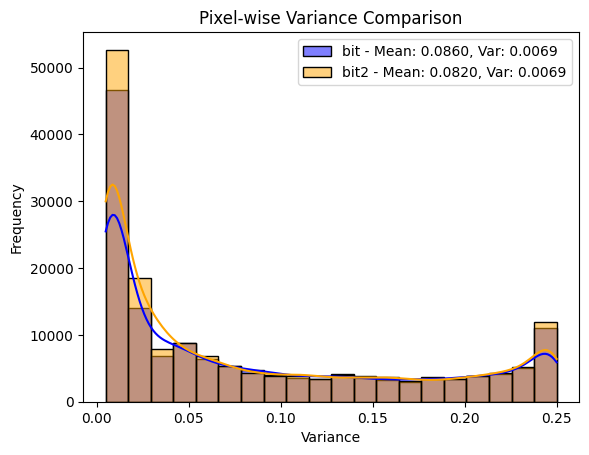

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Stack and compute variance for bit
stack1 = np.stack(bit.values)
var1 = np.var(stack1, axis=0).flatten()
var1 = var1[var1 > 0]
mean1 = np.mean(var1)
var1_var = np.var(var1)

# Stack and compute variance for bit2
stack2 = np.stack(bit2.values)
var2 = np.var(stack2, axis=0).flatten()
var2 = var2[var2 > 0]
mean2 = np.mean(var2)
var2_var = np.var(var2)

# Plot both
plt.figure()
sns.histplot(var1, bins=20, kde=True, color='blue', label=f'bit - Mean: {mean1:.4f}, Var: {var1_var:.4f}')
sns.histplot(var2, bins=20, kde=True, color='orange', label=f'bit2 - Mean: {mean2:.4f}, Var: {var2_var:.4f}')

plt.title('Pixel-wise Variance Comparison')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.legend()
plt.show()


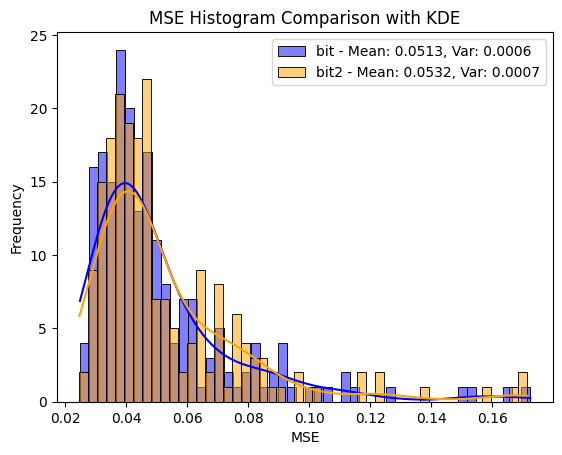

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MSE for bit
stack1 = np.stack(bit.values)
mean1_img = np.mean(stack1, axis=0)
mse1 = np.mean((stack1 - mean1_img) ** 2, axis=(1, 2))
mean1 = np.mean(mse1)
var1 = np.var(mse1)

# MSE for bit2
stack2 = np.stack(bit2.values)
mean2_img = np.mean(stack2, axis=0)
mse2 = np.mean((stack2 - mean2_img) ** 2, axis=(1, 2))
mean2 = np.mean(mse2)
var2 = np.var(mse2)

# Plot
plt.figure()
sns.histplot(mse1, bins=50, kde=True, color='blue', label=f'bit - Mean: {mean1:.4f}, Var: {var1:.4f}')
sns.histplot(mse2, bins=50, kde=True, color='orange', label=f'bit2 - Mean: {mean2:.4f}, Var: {var2:.4f}')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.title('MSE Histogram Comparison with KDE')
plt.legend()
plt.show()


In [95]:
df2

,curve_points,area,perimeter,bitmap
0,"[[-0.5523851402806536, -0.08640138001299702, 0...",-2.478948,3.143161,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0.42200908132544024, -0.33235905922040887, 0...",-0.152047,1.831616,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[-0.022828429529006655, -0.05636168674288966,...",-0.539232,2.054208,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[-0.03678733179788485, -0.08600360963817666, ...",-0.404660,2.704130,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[-0.42635663850522176, -0.4087362750967979, 0...",-2.607833,3.354488,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...
295,"[[-0.06621411958983914, -0.2341049404615574, 0...",-0.793929,2.593559,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
296,"[[-0.10955862269582672, -0.06935320999399519, ...",-0.530476,2.252410,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
297,"[[-0.4571577080805911, -0.22473488170495948, 0...",-3.079260,3.417668,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
298,"[[-0.2613712576107247, -0.04198457473622996, 0...",-2.283391,3.386685,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


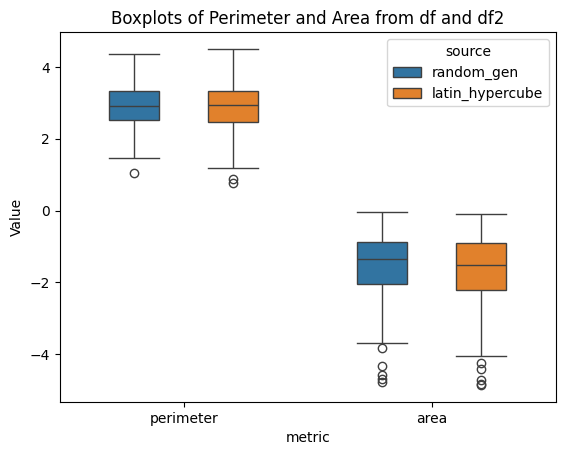

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a source column to each
df['source'] = 'random_gen'
df2['source'] = 'latin_hypercube'

# Combine both dataframes
combined = pd.concat([df, df2])

# Melt to long format
melted = pd.melt(combined, id_vars='source', value_vars=['perimeter', 'area'], 
                 var_name='metric', value_name='value')

# Plot
plt.figure()
sns.boxplot(x='metric', y='value', hue='source', data=melted, widths=0.2)
plt.title('Boxplots of Perimeter and Area from df and df2')
plt.ylabel('Value')
plt.show()


In [190]:
# Generic imports
#%%
import os
import random
import shutil
import progress.bar
from   datetime import datetime
from scipy.stats import qmc
import pandas as pd


import shapes
import meshes
import importlib

importlib.reload(shapes)
importlib.reload(meshes)

from shapes import *
from meshes import *

### ************************************************
### Generate full dataset
# Parameters
def generate_samples(numero_samples,n_base, latin_gen):
    n_sampling_pts = 20
    mesh_domain    = False
    plot_pts       = True
    show_quadrants = True
    n_shapes       = numero_samples
    time           = datetime.now().strftime('%Y-%m-%d_%H_%M_%S')
    dataset_dir    = 'dataset_'+time+'/'
    mesh_dir       = dataset_dir+'meshes/'
    img_dir        = dataset_dir+'images/'
    det_img_dir    = dataset_dir+'det_images/'
    bit_img_dir    = dataset_dir+'bit_images/'
    save_det_plot = False

    filename       = 'shape'
    magnify        = 1.0
    max_radius = (2)**0.5
    xmin           =-2.0
    xmax           = 2.0
    ymin           =-2.0
    ymax           = 2.0
    n_tri_max      = 5000
    n_pts = n_base

    ### generate latin hypercube points in the defined space
    equ_dim_lim = 1.5

    if latin_gen != False:
        latin_gen = qmc.LatinHypercube(d=n_pts*2)
        latin_gen = latin_gen.random(n=n_shapes)
        latin_gen = equ_dim_lim * latin_gen


    # Create directories if necessary
    if not os.path.exists(mesh_dir):
        os.makedirs(mesh_dir)
    if not os.path.exists(img_dir):
        os.makedirs(img_dir)
    if not os.path.exists(det_img_dir):
        os.makedirs(det_img_dir)
    if not os.path.exists(bit_img_dir):
        os.makedirs(bit_img_dir)

    # Generate dataset
    bar = progress.bar.Bar('Generating shapes', max=n_shapes)
    df = pd.DataFrame(columns=['curve_points', 'area', 'perimeter','bitmap'])

    for i in range(0,n_shapes):
        generated = False
        while (not generated):

            #n_pts  = random.randint(3, 7)
            radius = np.random.uniform(0.0, 1.0, size=n_pts)
            edgy   = np.random.uniform(0.0, .5, size=n_pts)
            shape  = Shape(filename+'_'+str(i),
                        None,
                        n_pts,
                        n_sampling_pts,
                        radius,
                        edgy,
                        save_det_plot = save_det_plot)
            
            shape.generate(magnify=1.0,
                        xmin=xmin,
                        xmax=xmax,
                        ymin=ymin,
                        ymax=ymax,
                        latin_gen = latin_gen)
            
            if save_det_plot:
                img  = filename+'_'+str(i)+"det_plot"+'.png'
                shutil.move(img,  det_img_dir)
            
            shape.generate_bitmap()
            """
            img  = filename+'_'+str(i)+"bit"+'.png'
            shutil.move(img,  bit_img_dir)
            """

            new_rows = [{'curve_points': shape.curve_pts, 'area': shape.area, 'perimeter': shape.curve_length, "bitmap": shape.bitmap}]
            df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
            generated = True
            #meshed, n_tri = shape.mesh()
            """
            if (True):
                shape.generate_image(plot_pts=plot_pts,
                                    max_radius = max_radius,
                                    xmin=xmin,
                                    xmax=xmax,
                                    ymin=ymin,
                                    ymax=ymax,
                                    show_quadrants=True)
                img  = filename+'_'+str(i)+'.png'
                mesh = filename+'_'+str(i)+'.mesh'
                shutil.move(img,  img_dir)
                #shutil.move(mesh, mesh_dir)
                generated = True
            """
        bar.next()
    bit = df["bitmap"]
    curve = df["area"]
    # End bar
    bar.finish()
    return bit,df

    # %%


In [134]:
bit1,df1 = generate_samples(200, True)
bit2,df2 = generate_samples(200, False)

/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/117411780.py:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/117411780.py:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


<Figure size 640x480 with 0 Axes>

In [ ]:
stack1 = np.stack(bit.values)
mean1_img = np.mean(stack1, axis=0)
mse1 = np.mean((stack1 - mean1_img) ** 2, axis=(1, 2))
mean1 = np.mean(mse1)
var1 = np.var(mse1)

(500, 500)

In [172]:
list_mse_mean_f = np.array([])
list_mse_var_f = np.array([])


for i in range(100, 501, 100):
    list_mse_mean = np.array([])
    list_mse_var = np.array([])
    
    for j in range(10):
        bit, df1 = generate_samples(int(i), True)
        stack1 = np.stack(bit.values)
        mean1_img = np.mean(stack1, axis=0)
        mse1 = np.mean((stack1 - mean1_img) ** 2, axis=(1, 2))
        mean1 = np.mean(mse1)
        var1 = np.var(mse1)
        list_mse_mean = np.append(list_mse_mean, mean1)
        list_mse_var = np.append(list_mse_var, var1)

    list_mse_mean_f = np.append(list_mse_mean_f, list_mse_mean.mean())
    list_mse_var_f = np.append(list_mse_var_f, list_mse_var.var())


/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/1090734736.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/1090734736.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/1090734736.py:105: FutureWarning: The behavior 

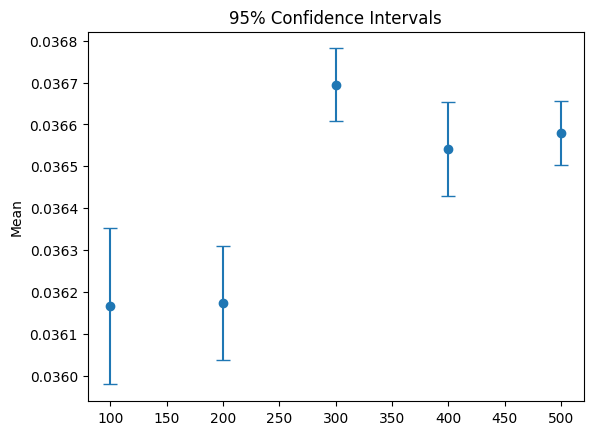

In [173]:
import numpy as np
import matplotlib.pyplot as plt

means = list_mse_mean_f
variances = list_mse_var_f
std_devs = np.sqrt(variances)

# 95% confidence interval
error = 1.96 * std_devs

x = np.linspace(100,500,5)
plt.errorbar(x, means, yerr=error, fmt='o', capsize=5)
plt.ylabel('Mean')
plt.title('95% Confidence Intervals')
plt.show()


In [170]:
list_mse_mean_r = np.array([])
list_mse_var_r = np.array([])


for i in range(100, 501, 100):
    list_mse_mean = np.array([])
    list_mse_var = np.array([])
    
    for j in range(10):
        bit, df1 = generate_samples(int(i), False)
        stack1 = np.stack(bit.values)
        mean1_img = np.mean(stack1, axis=0)
        mse1 = np.mean((stack1 - mean1_img) ** 2, axis=(1, 2))
        mean1 = np.mean(mse1)
        var1 = np.var(mse1)
        list_mse_mean = np.append(list_mse_mean, mean1)
        list_mse_var = np.append(list_mse_var, var1)

    list_mse_mean_r = np.append(list_mse_mean_r, list_mse_mean.mean())
    list_mse_var_r = np.append(list_mse_var_r, list_mse_var.var())


/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/1090734736.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/1090734736.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/1090734736.py:105: FutureWarning: The behavior 

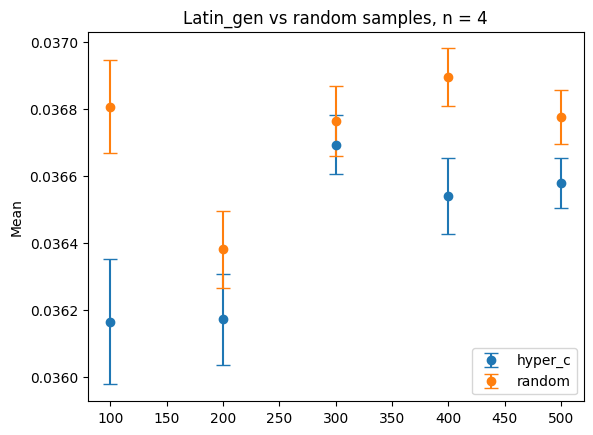

In [189]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

means = list_mse_mean_f
variances = list_mse_var_f
std_devs = np.sqrt(variances)

# 95% confidence interval
error = 1.96 * std_devs

x = np.linspace(100,500,5)
plt.errorbar(x, means, yerr=error, fmt='o', capsize=5, label = "hyper_c")


means = list_mse_mean_r
variances = list_mse_var_r
std_devs = np.sqrt(variances)

# 95% confidence interval
error = 1.96 * std_devs

x = np.linspace(100,500,5)
plt.errorbar(x, means, yerr=error, fmt='o', capsize=5, label = "random")
plt.ylabel('Mean')
plt.title('Latin_gen vs random samples, n = 4')
plt.legend()
plt.show()


In [183]:
np.random.rand(n_pts,2)

array([[0.09592337, 0.56503281],
       [0.17348258, 0.08232545],
       [0.96286996, 0.20260466],
       [0.96446514, 0.14366523]])

In [191]:
list_mse_mean_f = np.array([])
list_mse_var_f = np.array([])


for i in range(100, 501, 100):
    list_mse_mean = np.array([])
    list_mse_var = np.array([])
    
    for j in range(10):
        bit, df1 = generate_samples(int(i), 7, True)
        stack1 = np.stack(bit.values)
        mean1_img = np.mean(stack1, axis=0)
        mse1 = np.mean((stack1 - mean1_img) ** 2, axis=(1, 2))
        mean1 = np.mean(mse1)
        var1 = np.var(mse1)
        list_mse_mean = np.append(list_mse_mean, mean1)
        list_mse_var = np.append(list_mse_var, var1)

    list_mse_mean_f = np.append(list_mse_mean_f, list_mse_mean.mean())
    list_mse_var_f = np.append(list_mse_var_f, list_mse_var.var())


/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/2653948633.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/2653948633.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/2653948633.py:105: FutureWarning: The behavior 

In [198]:
list_mse_mean_f = np.array([])
list_mse_var_f = np.array([])


for i in range(100, 501, 100):
    list_mse_mean = np.array([])
    list_mse_var = np.array([])
    
    for j in range(10):
        bit, df1 = generate_samples(int(i), 7, False)
        stack1 = np.stack(bit.values)
        mean1_img = np.mean(stack1, axis=0)
        mse1 = np.mean((stack1 - mean1_img) ** 2, axis=(1, 2))
        mean1 = np.mean(mse1)
        var1 = np.var(mse1)
        list_mse_mean = np.append(list_mse_mean, mean1)
        list_mse_var = np.append(list_mse_var, var1)

    list_mse_mean_f = np.append(list_mse_mean_f, list_mse_mean.mean())
    list_mse_var_f = np.append(list_mse_var_f, list_mse_var.var())


/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/2653948633.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/2653948633.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
/var/folders/9p/c80ms72x1zq5xk4ppbknqzlm0000gn/T/ipykernel_19055/2653948633.py:105: FutureWarning: The behavior 

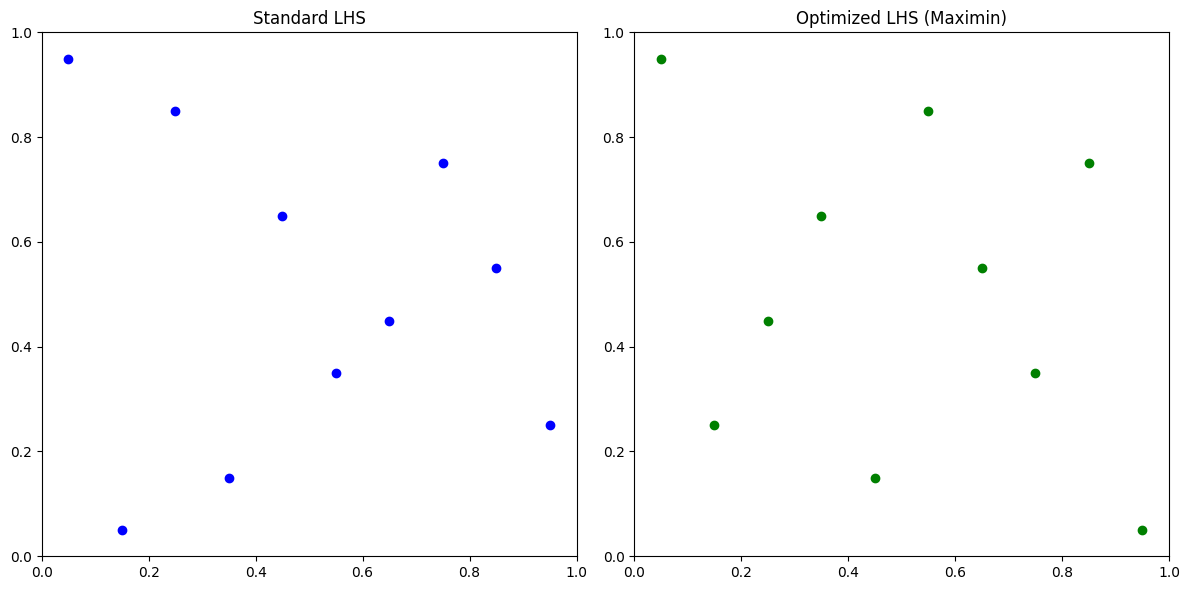

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE2 import lhs
from scipy.spatial.distance import pdist

def maximin_lhs(n_samples, n_features, iterations=100):
    best_dist = 0
    best_sample = None
    for _ in range(iterations):
        sample = lhs(n_features, samples=n_samples, criterion='center')
        dist = np.min(pdist(sample))
        if dist > best_dist:
            best_dist = dist
            best_sample = sample
    return best_sample

n_samples = 10
n_features = 2
lhs_std = lhs(n_features, samples=n_samples, criterion='center')
lhs_opt = maximin_lhs(n_samples, n_features)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(lhs_std[:, 0], lhs_std[:, 1], c='blue')
axs[0].set_title("Standard LHS")
axs[1].scatter(lhs_opt[:, 0], lhs_opt[:, 1], c='green')
axs[1].set_title("Optimized LHS (Maximin)")
for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()


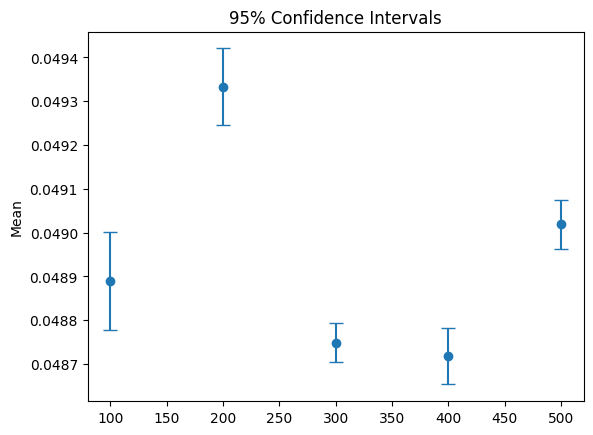

In [197]:
import numpy as np
import matplotlib.pyplot as plt

means = list_mse_mean_f
variances = list_mse_var_f
std_devs = np.sqrt(variances)

# 95% confidence interval
error = 1.96 * std_devs

x = np.linspace(100,500,5)
plt.errorbar(x, means, yerr=error, fmt='o', capsize=5)
plt.ylabel('Mean')
plt.title('95% Confidence Intervals')
plt.show()
